In [ ]:
# Author: Brandon Botzer
# Date: 2/21/2024
# Class: Penn State - AI 879

In [1]:
# Imports for functions

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2 as cv


# Showing the results of scipy computations
import pandas as pd

cv.__version__, ski.__version__

('4.8.1', '0.22.0')

In [2]:
# I do not have a training file that I have made so I will use this one temporarily
pretrained_file = ski.data.lbp_frontal_face_cascade_filename()

In [3]:
# Create the Cascade detector object
cascade_detector = ski.feature.Cascade(pretrained_file)

In [4]:
# Load in the image with and without faces
pos_im = ski.io.imread('face_test.jpg')
pos_im_cv = cv.imread('face_test.jpg')
neg_im = ski.io.imread('nature_image.jpg')
neg_im_cv = cv.imread('nature_image.jpg')

In [5]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces
#  Look into why this is the case
face_detected = cascade_detector.detect_multi_scale(img=pos_im,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.
'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.\n'

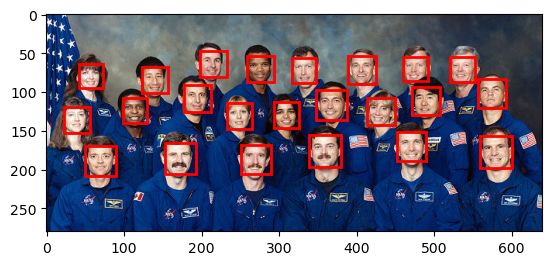

In [6]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

Trying again but with the XML file I build from MATLAB using the Local binary patterns FeatureType setting:

In [9]:
# I had to switch the FeatureType to Local Binary Pattern.
# Using HAAR results in a kernal crash.
# HOG is not found and causes exceptions to be thrown by the openCV classifier and invalid literals for integers for skimage.
trained_file2 = 'FaceModel_LBP.xml'
# Create the Cascade detector object
cascade_detector2_cv = cv.CascadeClassifier(trained_file2)
cascade_detector2_ski = ski.feature.Cascade(trained_file2)

## OpenCV

In [16]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces
#  Look into why this is the case
# face_detected2 = cascade_detector2.detectMultiScale


#OPENCV
face_detected2_cv = cascade_detector2_cv.detectMultiScale(image=pos_im_cv,
                                                          scaleFactor=1.2,
                                                    minSize=(20,20),
                                                    maxSize=(200, 200))


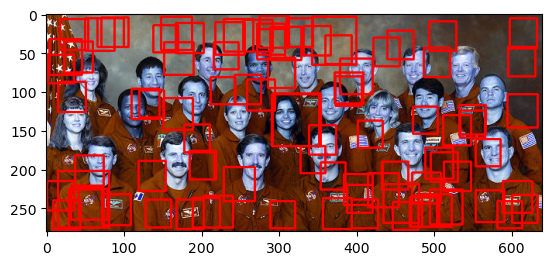

In [17]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for (x, y, width, height) in face_detected2_cv:

    # Add the patch to the image
    cv.rectangle(pos_im_cv, (x,y), (x+width, y+height), (255,0,0),2)

# Show me everything
plt.imshow(pos_im_cv)

## Skimage

In [14]:
# # #SKIMAGE
face_detected2_ski = cascade_detector2_ski.detect_multi_scale(img=pos_im_cv,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.'

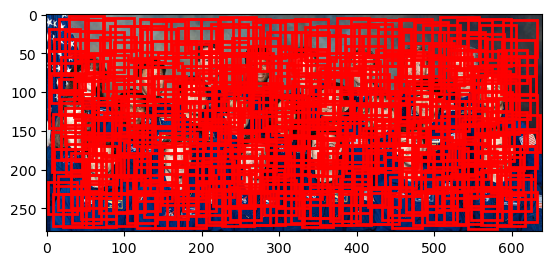

In [15]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected2_ski:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()